In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from FS.ssa import jfs   # change this to switch algorithm 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
Df = pd.read_csv("Datasets/colon_cancer.csv")

In [3]:
Df.head(5)

,samples,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000,response
0,1,3.622527,3.308826,2.986154,2.710537,2.091310,3.119126,2.745517,2.421422,3.352726,...,-1.026668,-0.983356,-0.531104,-1.142698,-1.108899,-0.520386,-0.314519,-1.764190,-2.749956,normal
1,2,3.470277,3.681609,3.425553,3.046109,2.402400,2.460531,2.150405,2.256655,3.020793,...,-1.232504,-3.063926,0.156281,-0.687025,-0.777089,-1.093455,-1.213857,-1.062064,-2.126398,normal
2,3,3.018884,2.783578,2.569772,3.211390,2.707560,2.632832,2.385288,3.001862,2.633958,...,-0.757976,0.318488,-1.251425,-1.099859,-0.130810,-2.748068,-1.014786,-2.260031,-1.496573,normal
3,4,3.097915,2.863956,2.772942,3.186238,2.354082,2.758829,2.103475,2.932663,3.176524,...,-1.175068,0.079492,-1.074746,-0.465491,-0.454513,-1.804783,-1.606205,-1.223450,-1.066161,normal
4,5,3.007979,2.905384,2.560548,3.253039,2.336800,3.040030,2.881109,2.548497,2.852425,...,-0.490512,-0.081214,-1.155846,-0.889998,-0.527681,-1.636024,-1.210256,-1.232686,-1.618022,normal


In [4]:
#D = pd.DataFrame(Df.columns)
#D

In [5]:
Df = Df.drop("samples", axis = 1)

In [6]:
#display(Df)

In [7]:
Df.isnull().sum()

V1          0
V2          0
V3          0
V4          0
V5          0
           ..
V1997       0
V1998       0
V1999       0
V2000       0
response    0
Length: 2001, dtype: int64

In [8]:
Df.shape

(62, 2001)

In [9]:
#Df.value_counts("response").plot(kind = 'bar')

In [10]:
lb = LabelEncoder()
Df["response"] = lb.fit_transform(Df["response"])

In [11]:
#Df["Response"]

In [12]:
Df = Df.apply(pd.to_numeric)

In [13]:
Df1 = Df.copy()

In [14]:
x = Df.drop(["response"], axis = 1)

In [15]:
y= Df1.loc[:,['response']]

In [16]:
#sc = StandardScaler()
#x1 = sc.fit_transform(x)

In [17]:
x = np.abs(x)

In [18]:
#x1 = x.copy()

In [19]:
y1 = y.copy()

In [20]:
#y = np.ravel(y)

In [21]:
#Now we apply our feature selection

In [22]:
#SELECTION WITH CHI-SQUARE TEST
fitt = SelectKBest(score_func = chi2, k = 100)
fitt.fit(x,y)

SelectKBest(k=100, score_func=<function chi2 at 0x0000029CC9C645E0>)

In [23]:
TabelScores = pd.DataFrame(fitt.scores_)
TabelFeatures = pd.DataFrame(x.columns)
GeneralTable = pd.concat([TabelFeatures, TabelScores], axis = 1)
GeneralTable.columns = ['Features', 'scores']

In [24]:
GeneralTable.sort_values(by = 'scores', ascending = False, inplace = True)

In [25]:
display(GeneralTable)

,Features,scores
248,V249,2.041874e+01
244,V245,1.599961e+01
764,V765,1.572433e+01
266,V267,1.500952e+01
492,V493,1.475981e+01
...,...,...
1872,V1873,4.872137e-06
204,V205,2.620829e-06
1730,V1731,1.383357e-06
1722,V1723,1.570893e-07


In [26]:
#GeneralTable = GeneralTable.reset_index(drop = True) resettin index to default. Future reference

In [27]:
top_Num = GeneralTable.head(100)
pd.set_option('display.max_rows', None)

In [28]:
display(top_Num)

,Features,scores
248,V249,20.418740
244,V245,15.999608
764,V765,15.724334
266,V267,15.009519
492,V493,14.759808
1634,V1635,10.980874
821,V822,10.904851
1581,V1582,9.260411
1770,V1771,8.393413
376,V377,8.185039


In [29]:
x1 = Df[['V249','V245','V765','V267','V493','V1635','V822','V1582','V1771','V377',
         'V739','V415','V1772','V513','V625','V1411','V1770','V1648','V1671','V780',
        'V1668','V1674','V1892','V286','V1897','V1387','V1983','V897','V143','V1870',
        'V1884','V201','V1414','V918','V807','V391','V1346','V1002','V830','V1843',
        'V1679','V365','V1285','V451','V910','V806','V1381','V159','V1924','V66',
        'V176','V142','V1583','V581','V1960','V1920','V437','V411','V1900','V561',
        'V1675','V1972','V1153','V1943','V993','V1328','V241','V1423','V980','V1904',
        'V495','V802','V343','V1946','V1867','V1758','V652','V661','V1798','V1724',
        'V520','V1935','V1398','V1672','V1115','V67','V419','V1326','V1894','V548',
        'V295','V1194','V732','V1651','V1666','V1570','V571','V1887','V1110','V1614']]

In [30]:
x_column = x1.copy()

In [31]:
#x_column

In [32]:
pd.set_option('display.max_columns', None)
x1.head(5)

,V249,V245,V765,V267,V493,V1635,V822,V1582,V1771,V377,V739,V415,V1772,V513,V625,V1411,V1770,V1648,V1671,V780,V1668,V1674,V1892,V286,V1897,V1387,V1983,V897,V143,V1870,V1884,V201,V1414,V918,V807,V391,V1346,V1002,V830,V1843,V1679,V365,V1285,V451,V910,V806,V1381,V159,V1924,V66,V176,V142,V1583,V581,V1960,V1920,V437,V411,V1900,V561,V1675,V1972,V1153,V1943,V993,V1328,V241,V1423,V980,V1904,V495,V802,V343,V1946,V1867,V1758,V652,V661,V1798,V1724,V520,V1935,V1398,V1672,V1115,V67,V419,V1326,V1894,V548,V295,V1194,V732,V1651,V1666,V1570,V571,V1887,V1110,V1614
0,2.231491,1.888216,1.965824,1.926576,1.681005,0.041893,2.885762,-1.193479,-1.173433,1.107265,1.780115,2.652427,-1.584033,0.558446,0.810918,1.474758,-1.048061,-1.440829,-2.398794,0.168632,-0.468374,-0.481712,-0.071766,2.241400,-0.887609,2.254121,-0.721758,1.397938,0.481836,-0.886011,-0.979039,2.667982,0.562090,1.421872,2.869949,0.667304,-1.363999,1.228655,0.877048,0.623026,-0.818059,-0.199948,-0.007571,1.338872,-0.012739,1.257297,-0.335761,2.188290,-1.468444,2.049503,1.107412,0.638231,-0.584237,0.898858,-0.810619,-2.074948,0.941429,-0.281304,-0.920791,0.069322,-0.759015,-0.233146,0.792947,-1.431748,2.066247,-0.054422,0.514342,1.885739,-0.305160,-1.776944,0.248297,0.632254,1.115355,-0.946053,-2.070206,-0.560781,0.250084,2.183895,0.824060,-1.704656,0.866665,-1.977302,-1.131010,-0.020346,-0.296194,1.902298,0.246781,0.409034,-0.491484,0.403565,1.374474,0.490419,-0.103192,-0.276348,-0.001773,-0.881609,-0.244136,-1.260573,-0.125817,-0.267496
1,1.738963,1.233675,1.446530,1.267408,1.361292,-0.899772,2.014939,-1.362908,-1.648777,0.685592,0.873254,2.414908,-1.620224,0.262584,0.819693,-1.880520,-2.587487,-1.297055,-1.371193,0.370854,-0.027267,0.066492,-1.290924,2.184533,-1.671641,1.195600,-0.658216,1.590496,1.091964,-0.193340,-1.670996,1.860656,-0.199736,1.490916,1.885927,0.463182,-1.131325,0.873050,0.421912,-0.503161,-0.236226,0.274147,0.186527,-0.318509,0.336580,0.780433,0.040985,1.378277,-0.830089,0.976626,0.431010,1.226254,-1.107567,1.238809,-1.064721,-0.971048,0.782794,-0.018628,-0.813039,0.680617,-0.839654,0.090045,0.968418,-1.504903,0.966662,0.585884,0.427567,1.724955,0.019810,-1.385264,-0.177069,0.267902,1.064142,-0.882753,-2.106190,-0.557160,0.184339,2.406960,0.485674,-2.532612,0.956031,-2.367909,-1.295519,0.383478,-0.287337,1.129387,0.139897,-0.355232,-0.690242,0.252285,0.937392,-0.203364,-0.178779,-0.760147,-0.345617,-1.025098,-0.159167,-1.176798,-0.300439,-1.292123
2,2.817083,2.498496,2.453886,2.510801,1.239221,-0.023175,1.388148,-0.295681,-0.952563,0.593760,1.171269,1.420579,-0.601467,0.624859,0.325928,1.189640,-1.682331,-1.312987,-1.077815,0.286446,-0.089371,-1.171307,0.094791,3.058117,-0.297100,1.260946,-1.642952,1.254874,1.679317,-1.034464,-0.751658,1.821511,0.330960,0.658642,1.905424,-0.347072,-0.376904,-0.265966,-0.066917,0.296442,-2.133072,0.930529,-0.528184,0.739755,-0.208802,0.742597,0.002481,1.935664,-0.147239,2.710349,0.567834,2.240846,-1.765876,0.252664,-0.910476,-2.166992,1.531884,1.167839,-2.500279,1.565825,-1.500825,-1.064836,-1.434825,0.204145,1.303913,0.480395,0.952459,1.072513,0.182779,-2.528786,0.050215,-0.902421,-0.141993,-1.961105,-1.458669,-1.414851,1.035955,1.366194,0.568379,-1.541279,-0.155807,-0.909947,-0.914628,-0.967329,-0.480932,1.779542,0.790952,0.892672,-0.690518,0.527439,0.176888,-0.095369,-0.032388,-1.165381,-1.408930,-0.019747,0.398329,-1.385401,0.085874,-0.422107
3,3.063591,2.351759,2.315695,2.288429,1.270279,-0.579003,1.978901,-1.031200,-1.938469,0.855857,1.083827,1.699747,-1.194307,0.537699,-0.175292,0.429508,-2.176462,-1.244386,-0.984862,0.210309,-0.347675,-0.657776,-2.007502,1.809730,-2.031852,1.515332,-3.129875,0.922144,2.829380,-1.483933,-1.267614,1.549430,0.292915,0.092119,3.101940,0.411028,-1.241355,-1.634305,0.030084,-0.386734,-1.069535,0.682338,-0.375823,0.670951,-0.263049,0.884041,0.437766,1.785228,-0.173331,1.830922,1.109139,2.773799,-1.554570,0.086766,-1.327259,-2.745942,1.745103,-0.091462,-0.886678,1.436902,-1.154598,-1.498032,-0.781218,

In [33]:
x1.shape

(62, 100)

In [34]:
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
x1 = np.abs(x1)

In [35]:
y1.shape
y1 = np.ravel(y1)

In [36]:
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
x1 = np.abs(x1)

In [37]:
#SELECTION WITH MUTUAL INFORMATION
fitt1 = SelectKBest(score_func = mutual_info_classif, k = 50)
fitt1.fit(x1,y1)

SelectKBest(k=50,
            score_func=<function mutual_info_classif at 0x0000029CC9C82EE0>)

In [38]:
'''TableScores1 = pd.DataFrame(fitt1.scores_)
TableFeatures1 = pd.DataFrame(x_column.columns)
GeneralTable1 = pd.concat([TableFeatures1, TableScores1], axis = 1)
GeneralTable1.columns = ['Features', 'scores']'''

"TableScores1 = pd.DataFrame(fitt1.scores_)\nTableFeatures1 = pd.DataFrame(x_column.columns)\nGeneralTable1 = pd.concat([TableFeatures1, TableScores1], axis = 1)\nGeneralTable1.columns = ['Features', 'scores']"

In [39]:
#GeneralTable1.sort_values(by = 'scores', ascending = False, inplace = True)

In [40]:
#display(GeneralTable1)

In [41]:
x1 = fitt1.transform(x1)

In [42]:
x1.shape

(62, 50)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3 , stratify = y)
fold = {'xt': x_train, 'yt': y_train, 'xv': x_test, 'yv': y_test}

In [44]:
#Now we set our parameters for SSA
K = 5 #K value in KNN
N = 20 #Population size
T = 20 #Max iter
options = {'k': K, 'fold': fold, 'N': N, 'T': T}

In [45]:
#Now we perform our feature selection by calling the module jfs
fmdl = jfs(x1, y1, options) #feature selection model
sf = fmdl['sf'] #index of selected features

Iteration: 1
Best (SSA): 0.2647263157894737
Iteration: 2
Best (SSA): 0.2635263157894737
Iteration: 3
Best (SSA): 0.21282105263157894
Iteration: 4
Best (SSA): 0.21282105263157894
Iteration: 5
Best (SSA): 0.21282105263157894
Iteration: 6
Best (SSA): 0.21282105263157894
Iteration: 7
Best (SSA): 0.21282105263157894
Iteration: 8
Best (SSA): 0.21282105263157894
Iteration: 9
Best (SSA): 0.21282105263157894
Iteration: 10
Best (SSA): 0.21282105263157894
Iteration: 11
Best (SSA): 0.16031578947368427
Iteration: 12
Best (SSA): 0.16031578947368427
Iteration: 13
Best (SSA): 0.16031578947368427
Iteration: 14
Best (SSA): 0.16031578947368427
Iteration: 15
Best (SSA): 0.16031578947368427
Iteration: 16
Best (SSA): 0.16031578947368427
Iteration: 17
Best (SSA): 0.16031578947368427
Iteration: 18
Best (SSA): 0.16031578947368427
Iteration: 19
Best (SSA): 0.16031578947368427
Iteration: 20
Best (SSA): 0.16031578947368427


In [46]:
print(sf)

[ 2  3  4  5  6  7 16 20 22 23 28 29 30 31 32 33 37 39 40 49]


In [47]:
#Model with selected features
num_train = np.size(x_train,0)#checks the number of samples slected in the x_train and assign to num_train
num_test = np.size(x_test, 0)#checks the number of samples slected in the x_test and assign to num_train
xtrain = x_train[:,sf]
ytrain = y_train.reshape(num_train)
xtest = x_test[:,sf]
ytest = y_test.reshape(num_test) #I suffered fixing the bug

In [48]:
model = KNeighborsClassifier(n_neighbors = 5) 
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [49]:
#Calculating for accuracy
y_pred = model.predict(xtest)
acc = accuracy_score(ytest, y_pred)

print('The accuracy is: ', round(acc, 2))

The accuracy is:  0.84


In [50]:
#Now we check the number of selected features
Nfea = len(sf)
print("The number of selected features is: ", str(Nfea))

The number of selected features is:  20


In [51]:
f_mea = classification_report(ytest, y_pred)
print(f_mea)

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.80      1.00      0.89        12

    accuracy                           0.84        19
   macro avg       0.90      0.79      0.81        19
weighted avg       0.87      0.84      0.83        19



In [52]:
cm = confusion_matrix(ytest, y_pred)

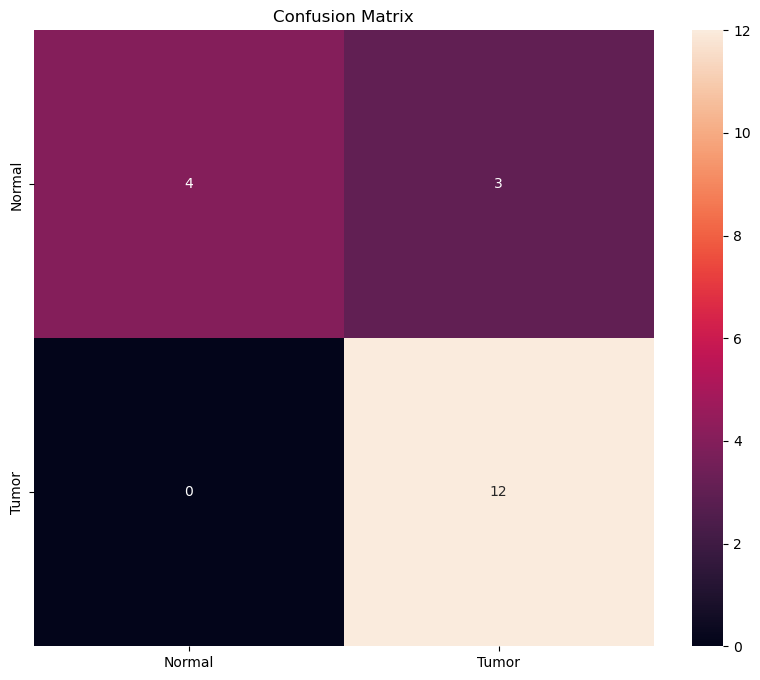

In [53]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, annot = True, fmt="d", xticklabels=["Normal", "Tumor"], 
                 yticklabels=["Normal", "Tumor"])
ax.set(title="Confusion Matrix");

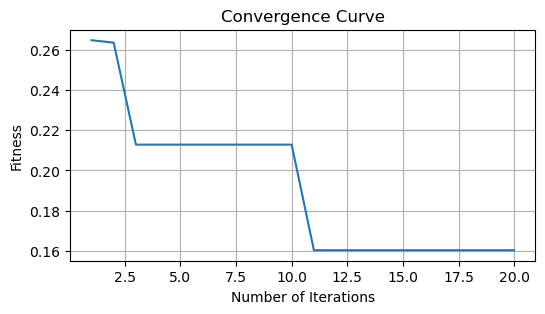

In [54]:

curve = fmdl['c']
curve = curve.reshape(np.size(curve, 1))
x = np.arange(0,options['T'], 1.0)+1.0

Fig, ax = plt.subplots(figsize = (6,3))
#ax.plot(x, curve, 'o-')
plt.plot(x, curve)
plt.xlabel('Number of Iterations', fontsize = 10)
plt.ylabel('Fitness', fontsize = 10)
plt.title('Convergence Curve', fontsize = 12)
plt.grid()
plt.show()